/home/arjuna_scagnetto/miniconda3/envs/venv0/lib/python3.11/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


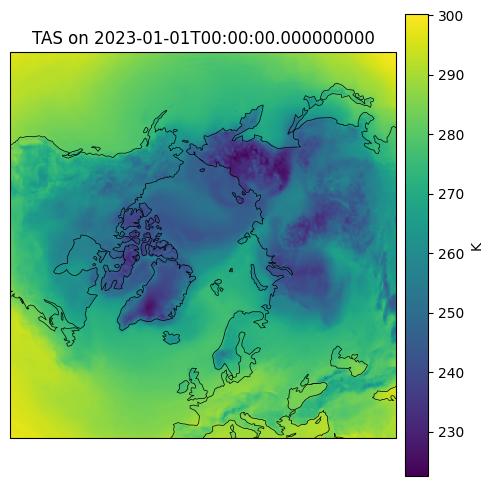

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy import feature

# 1) open the dataset
ds = xr.open_dataset('data/era5/north/tas/2023.nc')

# 2) pick one time slice (here the first day).
#    You can also do .sel(time='2023-01-01') if your time coords are dates.
da = ds['tas'].isel(time=0)


# 3) pull out the native‐grid coordinates
x = ds['xc']
y = ds['yc']

# 4) build the Cartopy projection object from the grid_mapping attributes
gm = ds['lambert_azimuthal_equal_area'].attrs
globe = ccrs.Globe(semimajor_axis=gm['semi_major_axis'],
                   semiminor_axis=gm['semi_minor_axis'])
proj = ccrs.LambertAzimuthalEqualArea(central_longitude=gm['longitude_of_projection_origin'],
                                      central_latitude=gm['latitude_of_projection_origin'],
                                      false_easting=gm['false_easting'],
                                      false_northing=gm['false_northing'],
                                      globe=globe)

# 5) plot with pcolormesh
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, projection=proj)
mesh = ax.pcolormesh(x, y, da,
                     transform=proj,
                     cmap='viridis')
ax.add_feature(feature.COASTLINE, linewidth=0.5, color='black')
ax.set_title(f"TAS on {str(ds['time'].values[0])}")
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label(da.attrs.get('units', ''))
plt.show()